<a href="https://colab.research.google.com/github/Gonzales-James/CpE-AIML/blob/main/Perceptron_Algorithm/58034_Lab06v2_Henerawr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **About the Dataset**

***Purpose of the Dataset*** 

The purpose of this dataset is to locate the lumps of the patient caused by the breast cancer. It also aims to observe which features will be most helpful in predicting malignant or benign cancer and to see general trends that may aid in model selection and hyper parameter selection. This dataset is used to classify whether breast cancer is benign or malignant.

\\

***Need statement*** 

One of the leading cancer diseases that is developed in many countries is breast cancer. The death toll dues to breast cancer have increased drastically in last few decades. The main issue that is relevant to its cure is early recognition of the disease. Early recognition of this disease can increase the survival rate of the women who are being diagnosed with breast cancer. One solution is integrating Data Analytics in to the medical field in order to resolve this issue.   

\\

***Significance*** 

The significance of this dataset is to recognize the disease early. Early diagnosis or recognition of breast cancer can increase the chance of survival and the patient can have their timely clinical treatment. With early recognition and classification of the disease can avoid unnecessary treatments of the patient. Classification and data mining methods are a productive process to classify and predict data especially in the medical field.

# Back Propagation

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

In [2]:
data = load_breast_cancer()

# Get features and target
X=data.data
y=data.target

In [3]:
y = pd.get_dummies(y).values
X = X[::,1:5]

y[:3]

array([[1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [4]:
class Back_Propagation:
  def __init__ (self, X, y):
    self.X = X
    self.y = y
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=20, random_state=4)
    # self.x = x
    # self.y_pred = y_pred
    # self.y_true = y_true
    self.learning_rate = 0.1
    self.iterations = 1000
    #self.N = self.y_train.size
    self.input_size = 4
    self.hidden_size = 2
    self.output_size = 2
    self.results = pd.DataFrame(columns=["mse", "accuracy"])
    self.W1 = np.random.normal(scale=0.5, size=(self.input_size, self.hidden_size))
    self.W2 = np.random.normal(scale=0.5, size=(self.hidden_size, self.output_size))
  
  def sigmoid(x):
    return 1 / (1 + np.exp(-x))
  
  def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
  
  def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()
  
  def bp(self):
    for itr in range(self.iterations):    
      # feedforward propagation
      # on hidden layer
      self.Z1 = np.dot(self.X_train, self.W1)
      self.A1 = Back_Propagation.sigmoid(self.Z1)

      # on output layer
      self.Z2 = np.dot(self.A1, self.W2)
      self.A2 = Back_Propagation.sigmoid(self.Z2)
      
      
      # Calculating error
      mse = Back_Propagation.mean_squared_error(self.A2, self.y_train)
      acc = Back_Propagation.accuracy(self.A2, self.y_train)
      self.results = self.results.append({"mse":mse, "accuracy":acc},ignore_index=True )
      
      # backpropagation
      self.E1 = self.A2 - self.y_train
      self.dW1 = self.E1 * self.A2 * (1 - self.A2)

      self.E2 = np.dot(self.dW1, self.W2.T)
      self.dW2 = self.E2 * self.A1 * (1 - self.A1)

      
      # weight updates
      self.W2_update = np.dot(self.A1.T, self.dW1) / self.y_train.size
      self.W1_update = np.dot(self.X_train.T, self.dW2) / self.y_train.size

      self.W2 = self.W2 - self.learning_rate * self.W2_update
      self.W1 = self.W1 - self.learning_rate * self.W1_update
    return self.results

  def visualize_v1(self):
     return self.results["mse"].plot(title="Mean Squared Error")

  def visualize_v2(self):
    return self.results.accuracy.plot(title="Accuracy")


In [5]:
BP = Back_Propagation(X, y)

In [6]:
BP.bp()

,mse,accuracy
0,0.121056,0.621129
1,0.121015,0.621129
2,0.120973,0.621129
3,0.120933,0.621129
4,0.120893,0.621129
...,...,...
995,0.117664,0.621129
996,0.117664,0.621129
997,0.117664,0.621129
998,0.117664,0.621129


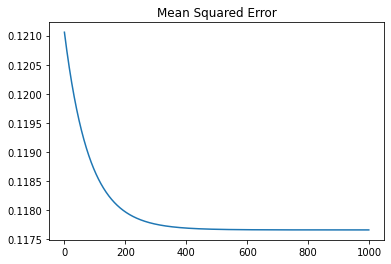

In [7]:
BP.visualize_v1()

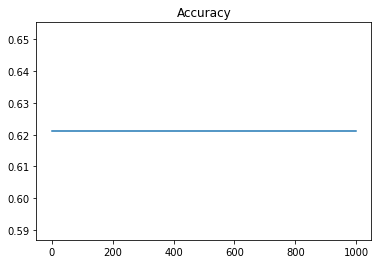

In [8]:
BP.visualize_v2()

# Gradient Descent

In [9]:
data = load_breast_cancer()

X=data.data
y=data.data

X = X[:20:,1:2]
y = y[:20:,1:3]
y = y[::,1]
y = y.reshape(-1,1)

X = np.array(X).ravel()
y = np.array(y).ravel()

In [10]:
class Gradient_Descent:
  # def __init__ (self, X, y):
  #   self.X = X
  #   self.y = y
  #   # self.learning_rate = learning_rate
  #   # self.iterations = iterations
  #   # self.lr = lr
  #   # self.n_iter = n_iter
  #   # self.theta = theta
  #   # self.X_b = X_b

  def  cal_cost(theta,X,y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost
  
  def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += Gradient_Descent.cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

  def result(X, y):
    lr =0.05
    n_iter = 30000

    theta = np.random.randn(2,1)

    X_b = np.c_[np.ones((len(X),1)),X]
    theta,cost_history = Gradient_Descent.stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)


    print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
    print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
  

In [11]:
GD = Gradient_Descent

In [12]:
GD.result(X, y)

Theta0:          120.723,
Theta1:          -0.424
Final cost/MSE:  619.091
